<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_12/Google's_PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XIV.2 Stationary distributions

In [1]:
import numpy as np
from numpy.linalg import eig, matrix_power, norm

In [2]:
PA = np.array([[1/2, 1/4, 1/4],
               [1/3, 1/3, 1/3],
               [1/3, 1/3, 1/3]])

In [3]:
[norm(matrix_power(PA.T, n+1) - matrix_power(PA.T, n), 'fro') for n in range(1, 20)]

[0.1402709019216955,
 0.023378483653615948,
 0.0038964139422693537,
 0.0006494023237115095,
 0.00010823372061852081,
 1.80389534364696e-05,
 3.0064922394683963e-06,
 5.010820398912459e-07,
 8.351367329688623e-08,
 1.3918945514670359e-08,
 2.3198243477163972e-09,
 3.86637279525466e-10,
 6.44396235375308e-11,
 1.073992260029489e-11,
 1.789976112476022e-12,
 2.9830188647232445e-13,
 4.977570743895776e-14,
 8.26743511340278e-15,
 1.343782689223772e-15]

In [4]:
ew, ev = eig(PA.T)
ew

array([0.16666667, 1.        , 0.        ])

In [5]:
v = ev[:, abs(ew-1) < 1.e-14]; print(v)

[[0.68599434]
 [0.51449576]
 [0.51449576]]


In [6]:
sA = v / v.sum()
sA

array([[0.4],
       [0.3],
       [0.3]])

In [7]:
matrix_power(PA.T, 1000)

array([[0.4, 0.4, 0.4],
       [0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3]])

In [8]:
PB = np.array([[0, 1/3, 1/3, 1/3],
               [0.9, 0, 0, 0.1],
               [0.9, 0.1, 0, 0],
               [0.9, 0, 0.1, 0]])

In [9]:
ew, ev = eig(PB.T); print(ew)

[-0.9 +0.j          1.  +0.j         -0.05+0.08660254j -0.05-0.08660254j]


In [10]:
 # stationary distribution:
v = ev[:, abs(ew-1) < 1.e-14];
sB = v.real / sum(v.real); print(sB)

[[0.47368421]
 [0.1754386 ]
 [0.1754386 ]
 [0.1754386 ]]


In [11]:
[norm(matrix_power(PB.T, n) - sB, 'fro') for n in range(300, 305)]

[2.0819420081737047e-14,
 1.9224558387957245e-14,
 1.6814381771214046e-14,
 1.558237665379239e-14,
 1.3619335994971806e-14]

In [12]:
PC = np.array([[0, 1, 0],
               [0, 0, 1],
               [1, 0, 0]])

In [13]:
ew, ev = eig(PC.T); print(ew)

[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]


In [14]:
# stationary distribution:
v = ev[:, abs(ew-1) < 1.e-14].real; sC = v/v.sum(); print(sC)

[[0.33333333]
 [0.33333333]
 [0.33333333]]


In [15]:
[norm(matrix_power(PC.T, n+1) - matrix_power(PC.T, n)) for n in range(100,105)]

[2.449489742783178,
 2.449489742783178,
 2.449489742783178,
 2.449489742783178,
 2.449489742783178]

In [16]:
[print('The %dth power:\n'%i, matrix_power(PC.T, i)) for i in range(300,306)];

The 300th power:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
The 301th power:
 [[0 0 1]
 [1 0 0]
 [0 1 0]]
The 302th power:
 [[0 1 0]
 [0 0 1]
 [1 0 0]]
The 303th power:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
The 304th power:
 [[0 0 1]
 [1 0 0]
 [0 1 0]]
The 305th power:
 [[0 1 0]
 [0 0 1]
 [1 0 0]]


# XIV.3 Perron’s theorem

In [17]:
A = np.array([[0.1, 0.9],
              [0.6, 0.4]])
ew, ev = eig(A)
ew

array([-0.5,  1. ])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
def plotcone(A0, A1, xlim=(0,1.1), ylim=(0,1.), matlabel='$A$',tt='Illustration of convergence of $A^n$'):
  t = np.linspace(0, 3, num=100)
  gridline0 = t[:, np.newaxis] * A0
  gridline1 = t[:, np.newaxis] * A1
  fig = plt.figure(); ax = plt.gca()
  for i in range(20):
    ax.plot(gridline0[:, 0], gridline0[:, 1], 'b')
    ax.plot(gridline1[:, 0], gridline1[:, 1], 'r')
    gridline0 += (1/5) * A1
    gridline1 += (1/5) * A0
  ax.set_xlim(xlim); ax.set_ylim(ylim)
  ax.set_title(tt)
  a0 = ax.arrow(0, 0, A0[0], A0[1], width=0.05, color='blue', alpha=0.3)
  a1 = ax.arrow(0, 0, A1[0], A1[1], width=0.05, color='red', alpha=0.3)
  plt.legend((a0, a1), ('First column vector of '+matlabel, 'Second_column vector of '+matlabel), loc='lower right');

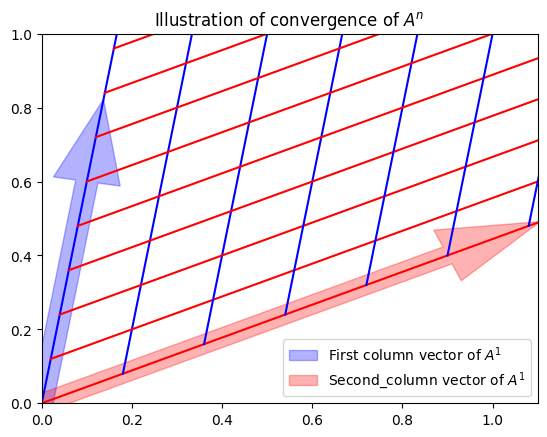

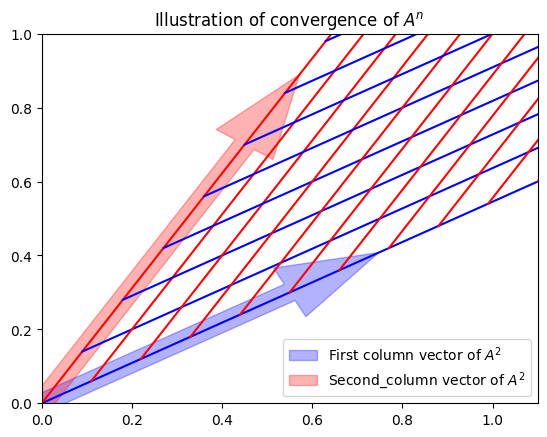

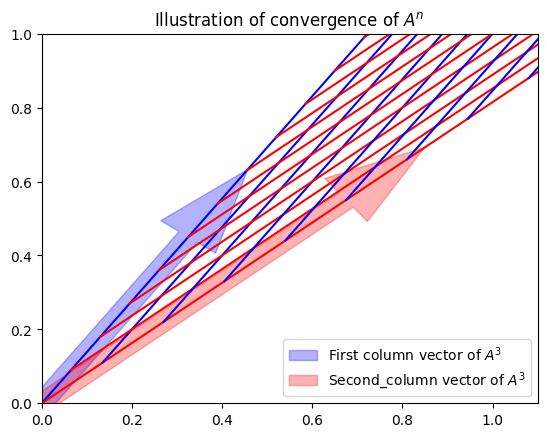

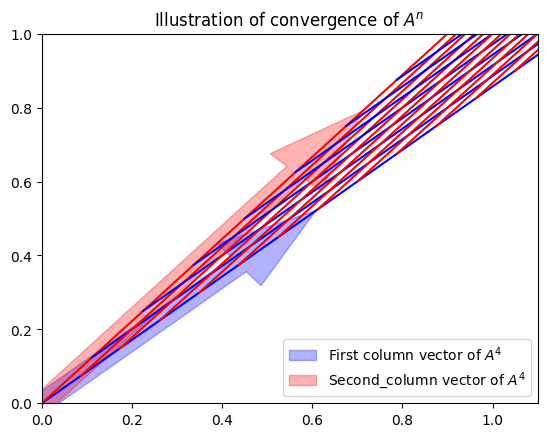

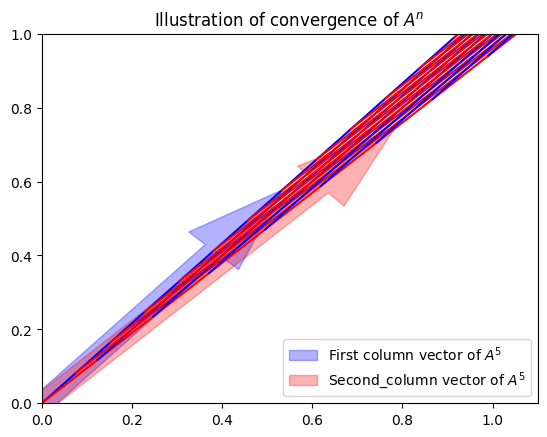

In [19]:
M = A.copy()
for i in range(5): # plot the cone between columns for each matrix power
  A0 = M[:, 0]
  A1 = M[:, 1]
  plotcone(A0, A1, matlabel='$A^'+str(i+1)+'$')
  M = M @ A

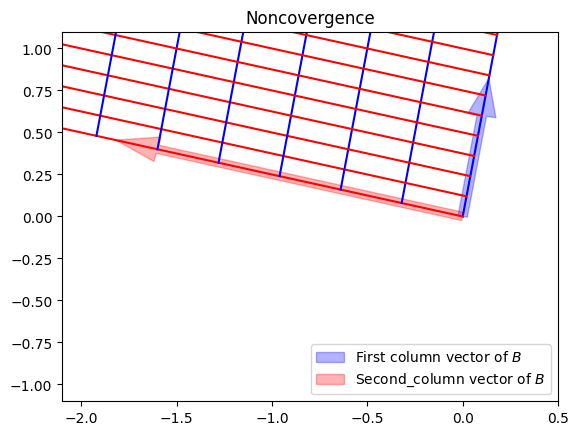

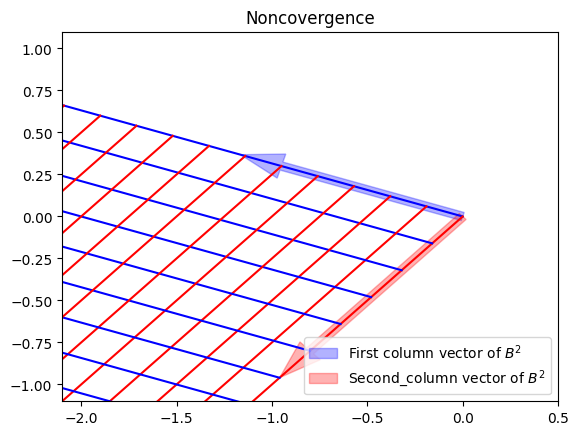

In [20]:
B = np.array([[0.1, -1.6], # change sign of one entry of A to get B
[0.6, 0.4]])
plotcone(B[:,0], B[:,1], xlim=(-2.1, 0.5), ylim=(-1.1, 1.1),matlabel='$B$', tt='Noncovergence')
B = B @ B
plotcone(B[:,0], B[:,1], xlim=(-2.1, 0.5), ylim=(-1.1, 1.1),matlabel='$B^2$', tt='Noncovergence')

In [21]:
matrix_power(PA, 1000) # P^1000 for Example A

array([[0.4, 0.3, 0.3],
       [0.4, 0.3, 0.3],
       [0.4, 0.3, 0.3]])

In [22]:
sA # the stationary distribution for Example A

array([[0.4],
       [0.3],
       [0.3]])

# XIV.4 PageRank

In [23]:
def pagerank(a, r):
  """ Return pagerank based on adjacency matrix "a" (square matrix
  of 0s or 1s) and given restart probability "r". Use only for small
  dense numpy matrices a. """
  m = a.sum(axis=1)
  dangling = (m==0)
  m[dangling] = 1
  w = (1 / m[:, np.newaxis]) * a
  w[dangling, :] = 1 / a.shape[0]
  p = (1-r) * w + (r / a.shape[0])
  ew, ev = eig(p.T)
  s = ev[:, abs(ew-1) < 1e-15].real
  return s / s.sum()

In [24]:
# 0 1 2 3 4 5 6 7 8 (Adjacency Matrix of the above␣graph)
A = np.array([[0, 1, 0, 0, 1, 0, 0, 0, 0], # 0
              [0, 0, 0, 0, 1, 0, 0, 0, 0], # 1
              [0, 0, 0, 0, 1, 0, 0, 0, 0], # 2
              [0, 0, 0, 0, 1, 0, 0, 0, 0], # 3
              [0, 0, 0, 0, 0, 0, 1, 0, 0], # 4
              [0, 0, 0, 0, 1, 0, 0, 0, 0], # 5
              [0, 0, 0, 0, 0, 1, 0, 0, 0], # 6
              [0, 0, 0, 0, 0, 1, 0, 0, 0], # 7
              [0, 0, 0, 0, 0, 1, 0, 0, 0]]) # 8

In [25]:
pagerank(A, 0.1)

array([[0.01111111],
       [0.01611111],
       [0.01111111],
       [0.01111111],
       [0.32328823],
       [0.30297458],
       [0.30207052],
       [0.01111111],
       [0.01111111]])

In [26]:
pagerank(A, 0.01)

array([[0.00111111],
       [0.00166111],
       [0.00111111],
       [0.00111111],
       [0.33239996],
       [0.33019631],
       [0.33018707],
       [0.00111111],
       [0.00111111]])

In [27]:
pagerank(A, 0.0)

array([[-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.33333333],
       [ 0.33333333],
       [ 0.33333333],
       [-0.        ],
       [-0.        ]])

# XIV.5 Perron-Frobenius theorem